In [82]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("company.csv")

In [73]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [74]:
company.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


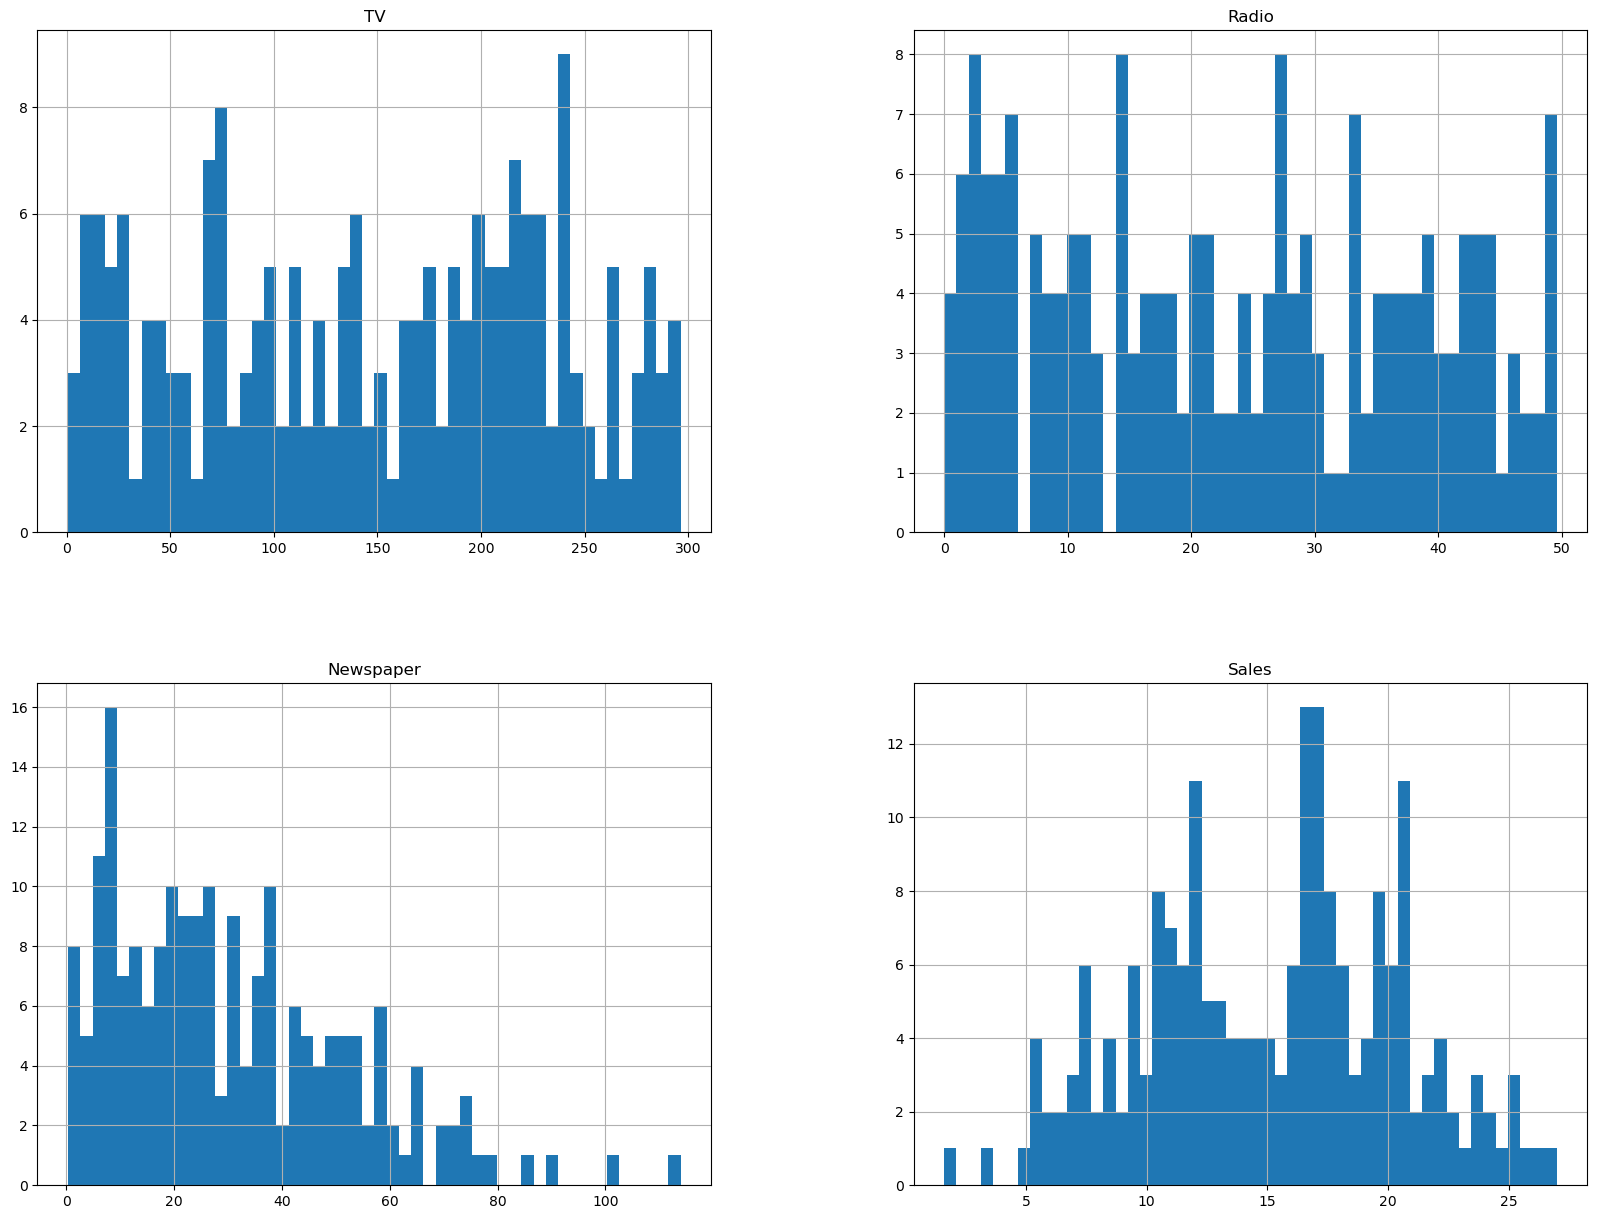

In [75]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [76]:
test_set.head()

,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9
15,195.4,47.7,52.9,22.4
30,292.9,28.3,43.2,21.4
158,11.7,36.9,45.2,7.3
128,220.3,49.0,3.2,24.7


In [77]:
train_set.head()

,TV,Radio,Newspaper,Sales
79,116.0,7.7,23.1,11.0
197,177.0,9.3,6.4,14.8
38,43.1,26.7,35.1,10.1
24,62.3,12.6,18.3,9.7
122,224.0,2.4,15.6,16.6


In [78]:
train_set.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [79]:



X = df.drop(columns=['Sales'])
y = df['Sales']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

model = LinearRegression().fit(X_train, y_train)

y_pred= model.predict(X_test)

print(mean_squared_error(y_test, y_pred))



2.907756910271091


In [81]:

X = df.drop(columns=['Sales'])
y = df['Sales']

X = pd.get_dummies(X)


models = {
    'Linear Regression': LinearRegression(),
    
    'Decision Tree': DecisionTreeRegressor()
}

num_folds = 5
results = {}
for name, model in models.items():
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_results)
    results[name] = rmse_scores

for name, scores in results.items():
    print(f"{name}: Mean RMSE: {scores.mean()}, Std Dev: {scores.std()}")

Linear Regression: Mean RMSE: 1.6758189912638621, Std Dev: 0.11281300851737049
Decision Tree: Mean RMSE: 1.588567681047081, Std Dev: 0.2518982388439804
